<a href="https://colab.research.google.com/github/jonasfelipe22/DLVC/blob/main/TP2_Jonas_Felipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 2 -Jonas Felipe Barros Silva - Dígitos MNIST com rede totalmente conectada

O objetivo é adaptar o classificador mostrado para a base Fashion MNIST para a base de Dígitos do MNIST, que contem amostras de dígitos manuscritos de 0 a 9, devidamente rotulados. 

O classificador deve treinar até atingir acurácia de 99% e ser interrompido por uma callback. O treinamento deve acabar antes de se completar 10 épocas. 

Você deve completar os trechos indicados do código. 



## Codificação inicial

Importação do TensorFlow

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()


O conjunto de dados que usaremos é denominado "base de Dígitos do MNIST" e está incluído no bancos de dados embutidos no tf.keras. 

Ele pode ser carregado assim:



O método ``load_data`` do objeto ``mnist`` retorna dois conjuntos com duas listas. Um conjunto corresponde ao *treinamento* e outro ao *teste*. Cada conjunto é formado pelas imagens e respectivo rótulo. 

Mas como é feito esse armazenamento? Varie o índice ``item`` para verificar o conteúdo em diferentes itens da lista.


3
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246  14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  55 251 169   1 

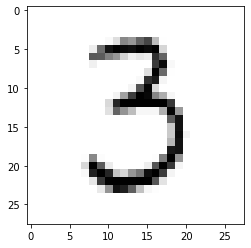

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
item = 50
plt.imshow(x_train[item],cmap='Greys')
print(y_train[item])
print(x_train[item])

As imagens são armazenadas em uma matriz 28 x 28. O valor de cada elemento da matriz contém a intensidade quantizada em 8 bits (0 a 255). 

Novamente, para facilitar o treinamento da rede, vamos ``normalizar`` os dados, divindindo as imagens por 255. 

In [ ]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

Sem a divisão dos conjuntos de treinamento e teste, não se
pode avaliar a acurácia do treinamento. 

Designando o modelo que será usado neste exemplo:

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: Esse comando define a seqüência de camadas da rede neural.

**Flatten**: Essa camada transforma a imagem "matricial" em um vetor linear. Literalmente um "achatamento"

**Dense**: Camada de neurônio. 

Cada camada de neurônios necessita de uma **função de ativação** para saber o que retornar para a camada seguinte. 

Existem diversas **funções de ativação**. Neste exemplo, temos duas: 

**Relu** "S X>0 retorne X, se não retorne 0" 

**Softmax** A partir de um conjunto de valores, escolhe o maior deles. Imagine um conjunto [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], a saída seria [0,0,0,0,1,0,0,0,0].




Vamos agora definir o modelo com **model.compile**, escolhendo uma função de perdas, um otimizar e a métrica para acompanhar o treinamento. 

O treinamento, novamente será feito com o **model.fit**, por 5 épocas. 

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2589 - accuracy: 0.9256
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1143 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0783 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9859


Ao fim das 5 épocas, a acurácia vai da faixa de 92% até 98%. Isso significa que a rede neural treinada classifica 98% dos itens do conjunto de treinamento corretamente. 

Para validar o treinamento, deve-se avaliar o conjunto de treinamento também. A rede neural não tem conhecimento prévio deste conjunto. O comando utilizado é **model.evaluate**. As entradas são as imagens de teste e os respectivos rótulos.

In [ ]:
model.evaluate(x_train, y_train)
m = tf.keras.metrics.Accuracy()
ac=m.result().numpy()

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0301 - accuracy: 0.9912


# Callback para interrupção do treinamento.  

Interrompemos o treinamento caso a métrica escolhida de precisão/acurracy >99%

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, metrics={}):
    if(metrics.get('accuracy')>0.99):
      print("\nAtingiu accuracy >0.99, cancelando treinamento")
      self.model.stop_training = True
callbacks = myCallback()
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train  = x_train / 255.0
x_test = x_test / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])


2.6.0
Epoch 1/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2019 - accuracy: 0.9399
Epoch 2/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0786 - accuracy: 0.9758
Epoch 3/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0522 - accuracy: 0.9835
Epoch 4/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0365 - accuracy: 0.9882
Epoch 5/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0263 - accuracy: 0.9914

Atingiu accuracy >0.99, cancelando treinamento
